# Preliminary dataset settings and data researching

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('df_for_test.csv', index_col = 0)
df.head()

,date,hits_today,feedback_click_today,choosen_add_today,choosen_remove_today,errors_today,size_table_click_today,banner_click_today,purchases_event_today,remove_events_today,checkout_events_today,detail_events_today,add_events_today,click_events_today,sessions_today,ball_click_today,form_send_today,seen_vertical_today,fast_view_today,transaction_revenue_today
0,2019-02-02,408859,0,73,22,0,0,2,60,0,1157,2366,129.0,2148,7716,8,78,682,912,1311360.0
1,2019-02-03,387178,0,51,8,0,0,0,48,0,1103,2065,87.0,2062,7601,3,81,586,783,1066500.0
2,2019-02-04,600668,0,191,10,0,0,1,82,0,1173,3523,148.0,3621,13371,7,123,442,1528,2188150.0
3,2019-02-05,630164,0,43,5,0,0,0,66,0,1424,4012,165.0,3629,13148,10,98,349,1446,1471080.0
4,2019-02-06,586453,0,88,7,0,0,12,111,1,1823,4244,252.0,3375,11731,32,92,317,1365,5672230.0


In [2]:
#Counting null values in columns to understand how much data is missed in columns
df.isnull().sum()


date                          0
hits_today                    0
feedback_click_today          0
choosen_add_today             0
choosen_remove_today          0
errors_today                  0
size_table_click_today        0
banner_click_today            0
purchases_event_today         0
remove_events_today           0
checkout_events_today         0
detail_events_today           0
add_events_today             12
click_events_today            0
sessions_today                0
ball_click_today              0
form_send_today               0
seen_vertical_today           0
fast_view_today               0
transaction_revenue_today     5
dtype: int64

In [3]:
#learning more about datasets. 
df.describe()

,hits_today,feedback_click_today,choosen_add_today,choosen_remove_today,errors_today,size_table_click_today,banner_click_today,purchases_event_today,remove_events_today,checkout_events_today,detail_events_today,add_events_today,click_events_today,sessions_today,ball_click_today,form_send_today,seen_vertical_today,fast_view_today,transaction_revenue_today
count,1.720000e+02,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,160.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.670000e+02
mean,6.873193e+05,102.383721,155.604651,13.959302,0.0,152.755814,225.726744,107.965116,49.250000,1444.581395,12993.988372,431.406250,3806.843023,12205.906977,13.430233,187.104651,3775.087209,506.901163,2.333011e+06
std,2.663284e+05,74.479742,78.160545,11.442895,0.0,113.439572,148.369307,46.696093,37.983395,716.361836,5085.258424,186.487772,1357.874476,3653.502830,7.806941,109.224917,6368.270827,693.767523,1.188868e+06
min,7.650000e+03,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,1.459100e+05
25%,5.469582e+05,9.000000,102.750000,6.000000,0.0,0.000000,65.000000,79.000000,4.000000,1013.250000,10581.500000,333.000000,3080.250000,10323.500000,8.000000,124.750000,136.500000,108.750000,1.567414e+06
50%,6.428965e+05,111.500000,145.000000,11.000000,0.0,180.000000,240.000000,104.000000,52.000000,1345.500000,13765.500000,412.000000,3711.000000,12389.500000,13.000000,174.500000,205.000000,162.000000,2.175710e+06
75%,8.124370e+05,160.750000,194.250000,18.000000,0.0,241.000000,315.500000,134.000000,72.250000,1824.000000,15972.250000,554.250000,4629.000000,14822.250000,18.000000,229.250000,6310.750000,421.500000,2.799308e+06
max,2.088954e+06,267.000000,390.000000,57.000000,0.0,407.000000,739.000000,287.000000,169.000000,3885.000000,29679.000000,1005.000000,8715.000000,19963.000000,47.000000,834.000000,26895.000000,2898.000000,7.412134e+06


It looks like columns "errors_today" and "date" will not be needed for our analysis: in 'errors_today' all values are equal zero, and 'date' column has the role of second index. Also we can learn that there is no text or bool data in dataset, only numerical.

In [4]:
df = df.drop('errors_today', axis = 1)
train_df = df[:160].dropna()
#Dropping rows with missing data. Not filling it because it could actually alter it if there is
# data that doesn't have normal distribution
test_df = df[160:]


# Anomalies cleaning

In [5]:
#importing libraries needed for anomalies cleaning
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.decomposition import PCA

* We shall keep all parameters, exept for index and date for machine learning. We'll keep it in numpy array params, also transforming them to float64 type. Also we'll scale all parameters for all the values lie between -1 and 1. It is important, because all variables become equally important for the result and variable size doesn't alter the result of training.

In [6]:
params = np.array(train_df.values[:,1:], dtype="float64")
params = scale(params) 

In [7]:
#choosing two main components of the data using Scikit-learn Principal Component Analysis

X = PCA(n_components=2).fit_transform(params)
num = X.shape[0]
# Choosing percentage of outline data
OUTLIER_FRACTION = 0.05
print(num)

155


In [8]:
#One-class SVM allows to classify objects. Creating classifier with Hauss distribution and training the data

clf = svm.OneClassSVM(kernel="rbf")
clf.fit(X)

e:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='rbf', max_iter=-1, nu=0.5, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

* Creating array dist_to_border, that saves the distance from data X to calculated border. After we chose the outliner fraction, we create the border indicator. If it is positive, the value is within borders, if it is negative, the value is considered being an anomaly.

In [9]:
dist_to_border = clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

# Building scatter plot, illustrating clasterization and anomalies 

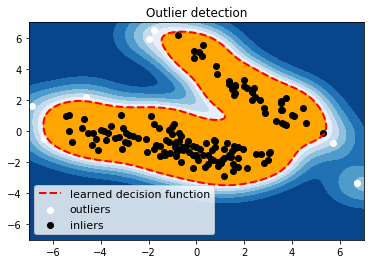

In [10]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * num)
n_outliers = int(OUTLIER_FRACTION * num)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_inlier == 0, 0], X[is_inlier == 0, 1], c='white')
c = plt.scatter(X[is_inlier == 1, 0], X[is_inlier == 1, 1], c='black')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.show()

In [11]:
#printing the anomalies

print (train_df[is_inlier == 0])

           date  hits_today  feedback_click_today  choosen_add_today  \
1    2019-02-03      387178                     0                 51   
23   2019-02-25     1296035                     5                234   
41   2019-03-15     1257538                     3                216   
47   2019-03-21      168887                    16                 29   
53   2019-03-27      144456                    26                 54   
76   2019-04-19      887972                   179                293   
142  2019-06-24     1011186                   123                323   
152  2019-07-04      937404                   222                248   

     choosen_remove_today  size_table_click_today  banner_click_today  \
1                       8                       0                   0   
23                     34                       0                  65   
41                     26                       8                  13   
47                      1                      24          

In [12]:
#Dropping the anomalies

df1 = train_df[is_inlier != 0]

In [13]:
#making correlation table to determine which variables are crucial for the analysis

cols = df.columns
corr_cols = cols.drop(['date'])
corr_matrix = train_df[corr_cols].corr()
corr_add_events = corr_matrix.loc['add_events_today']
print(corr_add_events)

hits_today                   0.605865
feedback_click_today         0.371301
choosen_add_today            0.561538
choosen_remove_today         0.204755
size_table_click_today       0.350023
banner_click_today           0.299738
purchases_event_today        0.690738
remove_events_today          0.563605
checkout_events_today        0.453915
detail_events_today          0.757050
add_events_today             1.000000
click_events_today           0.602378
sessions_today               0.542453
ball_click_today             0.255612
form_send_today              0.338679
seen_vertical_today          0.321844
fast_view_today             -0.007439
transaction_revenue_today    0.413853
Name: add_events_today, dtype: float64


In [14]:
#assuming that correlation more than 0.5 is considered strong. These columns will be needed when building final data predictions
cols = corr_add_events[corr_add_events>0.5].index
cols = cols[cols!= 'add_events_today']


In [15]:
print(cols)

Index(['hits_today', 'choosen_add_today', 'purchases_event_today',
       'remove_events_today', 'detail_events_today', 'click_events_today',
       'sessions_today'],
      dtype='object')


# Choosing from different machine learning models

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import LinearRegression

In [17]:
model_knn = KNeighborsRegressor()
model_lr = LinearRegression()

In [19]:
# making divisions within the dataset to determine which model fits better to the data
def model_choose(models = [model_knn,model_lr]):
    for model in models:
        kf = KFold(5, shuffle=True, random_state=1)
        mses = cross_val_score(model, df1[cols], df1['add_events_today'], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        print(model,'rmses = ',rmses, 'avg_rmse =', avg_rmse)
        
model_choose()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') rmses =  [ 94.43291799 109.29192712 125.72650668 103.15748255 104.35115121] avg_rmse = 107.39199711087414
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) rmses =  [ 55.4946892  153.05863173  45.38950018  43.40639003  64.96708362] avg_rmse = 72.46325895111197


* It looks like linear regression has shown the best result of average R squared that is why it is chosen as final predicting model

# Making final predictions with linear regression

In [20]:

features = df1[cols]
test_features = test_df[cols]

target = df1["add_events_today"]
model_lr.fit(features, target)
train_predictions = model_lr.predict(features)
test_predictions = model_lr.predict(test_features)
print(test_predictions)

[516.74449662 356.95685507 375.76829424 442.04842491 497.08447858
 837.56698577 536.63302095 504.77317585 286.52057904 330.37426283
 509.99030813 586.31018767]
